# Support Vector Regression
- Support Vector Machines support linear and non-linear regression that we can refer to as SVR
- Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVR tries to fit as many instances as possible on the street while limiting margin violations
- The width of the street is controlled by a hyper parameter Epsilon

In linear regression, we are trying to minimize the error between the prediction and data. In SVR, our goal is to make sure that errors do not exceed the threshold.

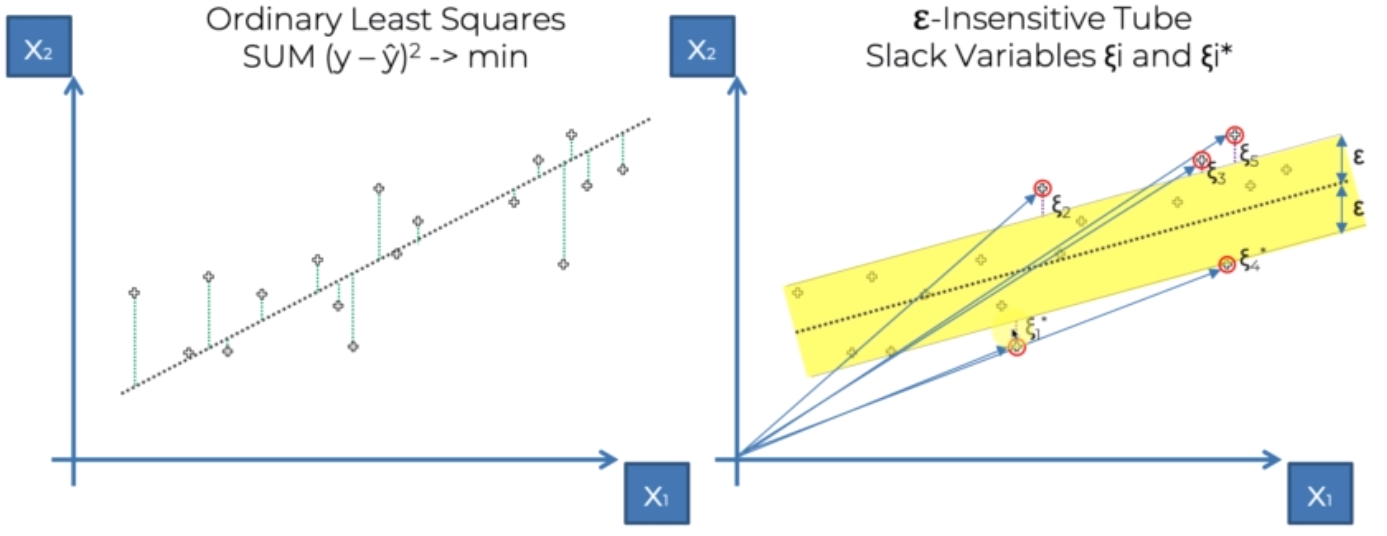

### $\epsilon$-Insensitive Tube
$$
\frac{1}{2} ||w||^2 + C \sum_{i=1}^m (\xi_i + \xi_i^*) \rightarrow \min
$$

### Features of SVR
- SVR performs linear regression in a higher dimensional space
- We can think of SVR as if each data point in the training represents it's own dimension. When you evaluate your kernel between a test point and a point in tht training set, the resulting value gives you the coordinate of your test point in that dimension.
- The vector we get when we evaluate the test point for all points inthe training set, $\vec{k}$ is the representation of the test point in the higher dimensional space

### Requirements
It requires a training set $\tau = \{ \vec{X}. \vec{Y} \}$ which covers the domain of interest and is accompanied by solutions on that domain. The work of SVM is to approximate the function we used to generate the training set $F(\vec{X}) = \vec{Y}$.

In a classification problem, the vectors $\vec{X}$ are used to define a hyperplane that separates the two different classes inyour solution. These vectors are used to perform linear regression. The vectors closest to the test point are referred to as support vectors. We can evaluate our function anywhere so any vectors could be closest to our test evaluation location.

### Building a SVR
- Collect a trraining set $\tau = \{ \vec{X}. \vec{Y} \}$
- Choose a kernel and it's parameteres as well as any regularization needed
- Form the correlation matrix $\vec{K}$
- Train your machine exactly or approximately to get contraction coefficients $\vec{\alpha}=\{ \alpha_i \}$
- Use those coefficients, create your estimator $f(\vec{X}, \vec{\alpha}, x^*) = y^*$

### Correlation Matrix
$$
K_{ij} = exp \bigg( \sum_k \theta_k | x_k^i - x_k^j |^2 \bigg) + \epsilon \delta_{ij}
$$

Main part of the algorithm is $\vec{K} \vec{\alpha} = \vec{y}$ where,
- $\vec{y}$ = Vector of values corresponding to training set
- $\vec{K}$ = Correlation matrix
- $\vec{\alpha}$ = Set of unknowns we need to solve for $\vec{\alpha} = \vec{K}^{-1} \vec{y}$

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Dataset
dataset = pd.read_csv('./Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# Preparing the Dataset
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Visualizing the new arrays
print("X = \n", X)
print("y = \n", y)

X = 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y = 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Here we have to apply feature scaling to both dependent as well as the independent variables, because of the huge difference in ranges, otherwise the independent variable would be ignored by the model. For this, we'd have to convert the dependent variable vector into a 2D array, as the library expects it that way before scaling.

### Feature Scaling

In [5]:
# Transforming y into 2D
y = y.reshape(len(y), 1)
print("y = \n", y)

y = 
 [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
# Visualizing the new arrays
print("X = \n", X)
print("y = \n", y)

X = 
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y = 
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the Model

In [8]:
# Fitting SVR to Dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting Results

In [9]:
# Predicting a new result
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)

[170370.0204065]


### Visualizations

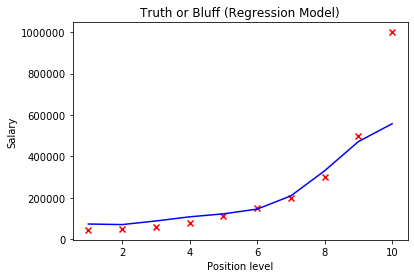

In [10]:
# Visualising the Regression results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', marker="x")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

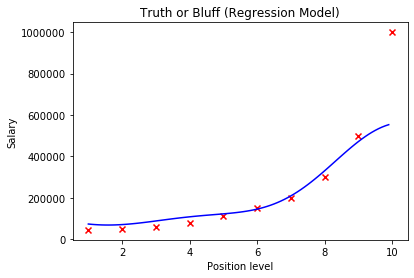

In [11]:
# Visualising with higher resolution and smoother curve
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', marker="x")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()